In [170]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import shap
import shap.plots

# Création du dataset
data = pd.DataFrame({
    'Feature1': [0, 1, 1, 1],
    'Feature2': [29, 64, 9, 39],
    'Churn': [1, 1, 0, 1]
})

# Séparation des caractéristiques et de la cible
X = data[['Feature1', 'Feature2']]
y = data['Churn']

# Entraînement du modèle de régression logistique
model = LogisticRegression().fit(X, y)

# Affichage des coefficients du modèle
print("Intercept (b0):", model.intercept_[0])
print("Coefficient pour Feature1 (b1):", model.coef_[0][0])
print("Coefficient pour Feature2 (b2):", model.coef_[0][1])


Intercept (b0): -7.433256983759463
Coefficient pour Feature1 (b1): -0.019028046424004682
Coefficient pour Feature2 (b2): 0.3922729461086157


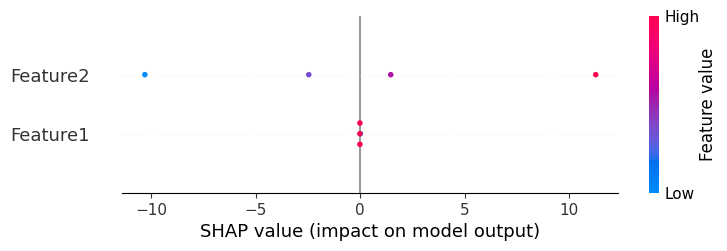

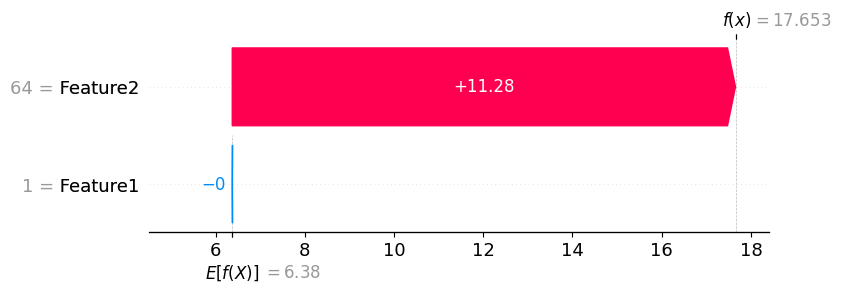

In [171]:
# Calcul des valeurs SHAP
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

# Affichage du summary plot
shap.summary_plot(shap_values.values, X)

# Affichage du waterfall plot pour la première instance
shap.plots.waterfall(shap_values[1])

In [172]:
# Calcul des valeurs SHAP
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

# Calcul de la valeur de E[f(x)]
e_f_x = shap_values.base_values[1]

print("E[f(x)] =", e_f_x)

E[f(x)] = 6.380093331751237


In [175]:
# Affichage des valeurs SHAP
for i, observation in enumerate(X.values):
    print("Observation", i+1, ":")
    for j, feature in enumerate(X.columns):
        print("   Feature", feature, ":", shap_values[i][j])

Observation 1 :
   Feature Feature1 : .values =
0.01427103481800351

.base_values =
6.380093331751237

.data =
0
   Feature Feature2 : .values =
-2.451705913178848

.base_values =
6.380093331751237

.data =
29
Observation 2 :
   Feature Feature1 : .values =
-0.0047570116060011705

.base_values =
6.380093331751237

.data =
1
   Feature Feature2 : .values =
11.2778472006227

.base_values =
6.380093331751237

.data =
64
Observation 3 :
   Feature Feature1 : .values =
-0.0047570116060011705

.base_values =
6.380093331751237

.data =
1
   Feature Feature2 : .values =
-10.297164835351161

.base_values =
6.380093331751237

.data =
9
Observation 4 :
   Feature Feature1 : .values =
-0.0047570116060011705

.base_values =
6.380093331751237

.data =
1
   Feature Feature2 : .values =
1.4710235479073088

.base_values =
6.380093331751237

.data =
39
